# <span style="color: #3498db;">π Estimation Using Monte Carlo Simulation</span>  

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set style for plots and initialize random number generator
plt.style.use('ggplot')
rng = np.random.default_rng(42)

# Enable inline plotting
%matplotlib inline

In [7]:
# Initialize variables
ni = 0  # points inside circle
nt = 0  # total points
pis = []
points_x = []
points_y = []
colors = []

# Simulation parameters
iterations = 100000
sample_points = 1000  # Points to display in scatter plot

In [8]:
# Run Monte Carlo simulation
for i in range(iterations):
    nt += 1
    x, y = rng.random(2)
    d = np.sqrt(x**2 + y**2)
    is_in_circle = d < 1.0
    
    if is_in_circle:
        ni += 1
        
    # Store points for visualization
    if i < sample_points:
        points_x.append(x)
        points_y.append(y)
        colors.append('blue' if is_in_circle else 'red')
    
    pi = 4 * (ni / nt)
    pis.append(pi)

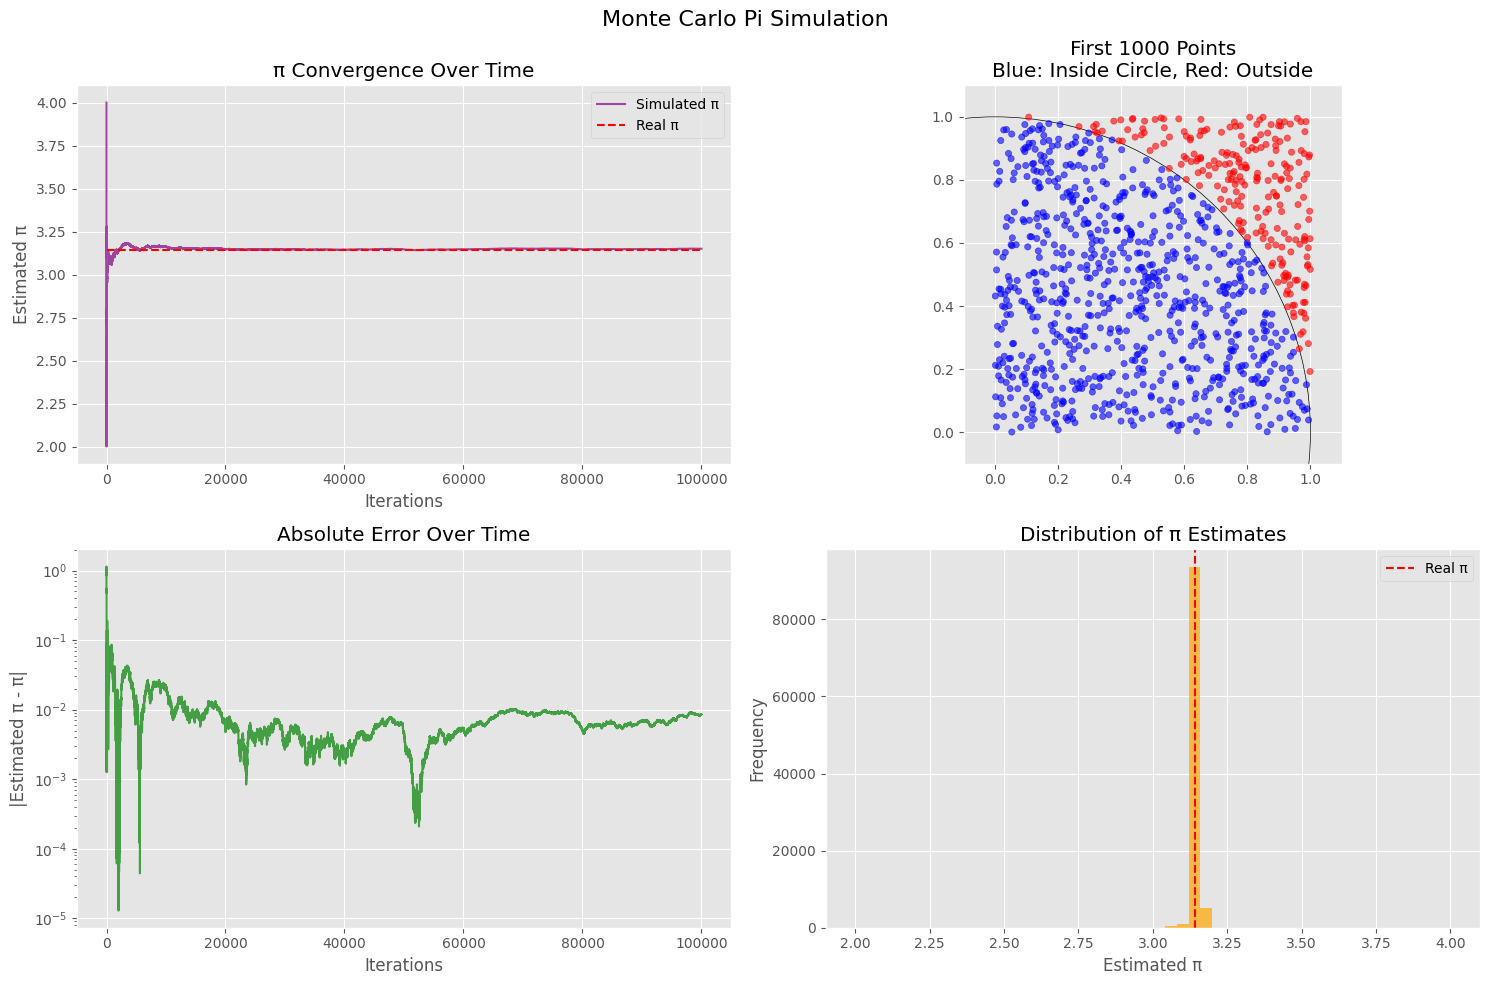

In [9]:
# Create a figure with subplots
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Monte Carlo Pi Simulation', fontsize=16)

# Plot 1: Pi convergence
ax1 = plt.subplot(2, 2, 1)
ax1.plot(pis, label="Simulated π", color='purple', alpha=0.7)
ax1.hlines(np.pi, 0, iterations, linestyles="--", colors="red", label="Real π")
ax1.set_title('π Convergence Over Time')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Estimated π')
ax1.grid(True)
ax1.legend()

# Plot 2: Points visualization
ax2 = plt.subplot(2, 2, 2)
circle = plt.Circle((0, 0), 1, fill=False, color='black')
ax2.add_artist(circle)
ax2.scatter(points_x, points_y, c=colors, alpha=0.6, s=20)
ax2.set_xlim(-0.1, 1.1)
ax2.set_ylim(-0.1, 1.1)
ax2.set_aspect('equal')
ax2.set_title(f'First {sample_points} Points\nBlue: Inside Circle, Red: Outside')
ax2.grid(True)

# Plot 3: Error convergence
ax3 = plt.subplot(2, 2, 3)
errors = [abs(p - np.pi) for p in pis]
ax3.plot(errors, color='green', alpha=0.7)
ax3.set_title('Absolute Error Over Time')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('|Estimated π - π|')
ax3.set_yscale('log')
ax3.grid(True)

# Plot 4: Histogram of π estimates
ax4 = plt.subplot(2, 2, 4)
ax4.hist(pis, bins=50, color='orange', alpha=0.7)
ax4.axvline(np.pi, color='red', linestyle='--', label='Real π')
ax4.set_title('Distribution of π Estimates')
ax4.set_xlabel('Estimated π')
ax4.set_ylabel('Frequency')
ax4.legend()

# Adjust layout and display
plt.savefig("monte_carlo_pi.png", dpi=300, bbox_inches="tight", transparent=False)
plt.tight_layout()
plt.show()

In [10]:
# Print final statistics
final_pi = pis[-1]
final_error = abs(final_pi - np.pi)
print(f"\nFinal Results:")
print(f"Estimated π: {final_pi:.6f}")
print(f"Actual π:    {np.pi:.6f}")
print(f"Error:       {final_error:.6f}")
print(f"Accuracy:    {(1 - final_error/np.pi) * 100:.4f}%")


Final Results:
Estimated π: 3.150080
Actual π:    3.141593
Error:       0.008487
Accuracy:    99.7298%
